In [13]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [14]:
df = pd.read_csv('C:/Users/91967/Downloads/kidney_disease.csv')

In [15]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [17]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [19]:
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [20]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [21]:
#Split the data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [22]:
X

,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,28,1
1,1.020,4.0,0.8,11.3,22,0
2,1.010,2.0,1.8,9.6,15,0
3,1.005,4.0,3.8,11.2,16,1
4,1.010,2.0,1.4,11.6,19,0
...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,31,0
396,1.025,0.0,1.2,16.5,38,0
397,1.020,0.0,0.6,15.8,33,0
398,1.025,0.0,1.0,14.2,35,0


In [23]:
X.describe()

,sg,al,sc,hemo,pcv,htn
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,1.017683,0.986063,2.502787,12.836934,23.358885,0.341463
std,0.005789,1.363798,3.346284,2.821576,8.665912,0.475029
min,1.005000,0.000000,0.400000,3.100000,0.000000,0.000000
25%,1.015000,0.000000,0.800000,10.850000,17.000000,0.000000
50%,1.020000,0.000000,1.200000,13.200000,25.000000,0.000000
75%,1.025000,2.000000,2.500000,15.000000,30.000000,1.000000
max,1.025000,5.000000,24.000000,17.800000,39.000000,1.000000


In [28]:
min_list=X.min().to_list()

In [29]:
min_list

[1.005, 0.0, 0.4, 3.1, 0.0, 0.0]

In [30]:
max_list=X.max().to_list()

In [31]:
max_list

[1.025, 5.0, 24.0, 17.8, 39.0, 1.0]

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 287, dtype: int32

In [10]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [11]:
#Split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [13]:
#Build The model
import keras as k
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [14]:
#Compile the model
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [17]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=X_train.shape[0],
                ) 

Epoch 1/2000
229/229 [==============================] - 0s 911us/step - loss: 0.7000 - accuracy: 0.5284
Epoch 2/2000
229/229 [==============================] - 0s 6us/step - loss: 0.6921 - accuracy: 0.5284
Epoch 3/2000
229/229 [==============================] - 0s 4us/step - loss: 0.6844 - accuracy: 0.5284
Epoch 4/2000
229/229 [==============================] - 0s 4us/step - loss: 0.6769 - accuracy: 0.8253
Epoch 5/2000
229/229 [==============================] - 0s 4us/step - loss: 0.6695 - accuracy: 0.9520
Epoch 6/2000
229/229 [==============================] - 0s 7us/step - loss: 0.6622 - accuracy: 0.9432
Epoch 7/2000
229/229 [==============================] - 0s 5us/step - loss: 0.6551 - accuracy: 0.9301
Epoch 8/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6480 - accuracy: 0.9258
Epoch 9/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6411 - accuracy: 0.9214
Epoch 10/2000
229/229 [==============================] - 0s 4us/step - loss: 0.6

Epoch 81/2000
229/229 [==============================] - 0s 13us/step - loss: 0.1763 - accuracy: 0.9258
Epoch 82/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1731 - accuracy: 0.9258
Epoch 83/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1701 - accuracy: 0.9258
Epoch 84/2000
229/229 [==============================] - 0s 13us/step - loss: 0.1672 - accuracy: 0.9258
Epoch 85/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1644 - accuracy: 0.9258
Epoch 86/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1617 - accuracy: 0.9258
Epoch 87/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1590 - accuracy: 0.9301
Epoch 88/2000
229/229 [==============================] - 0s 13us/step - loss: 0.1564 - accuracy: 0.9345
Epoch 89/2000
229/229 [==============================] - 0s 13us/step - loss: 0.1539 - accuracy: 0.9345
Epoch 90/2000
229/229 [==============================] - 0s 4us/step 

Epoch 160/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0709 - accuracy: 0.9694
Epoch 161/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0704 - accuracy: 0.9738
Epoch 162/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0699 - accuracy: 0.9738
Epoch 163/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0694 - accuracy: 0.9738
Epoch 164/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0688 - accuracy: 0.9738
Epoch 165/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0683 - accuracy: 0.9738
Epoch 166/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0678 - accuracy: 0.9738
Epoch 167/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0674 - accuracy: 0.9738
Epoch 168/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0669 - accuracy: 0.9738
Epoch 169/2000
229/229 [==============================] - 0s 4u

Epoch 239/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0445 - accuracy: 0.9782
Epoch 240/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0443 - accuracy: 0.9782
Epoch 241/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0441 - accuracy: 0.9782
Epoch 242/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0439 - accuracy: 0.9782
Epoch 243/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0437 - accuracy: 0.9782
Epoch 244/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0435 - accuracy: 0.9782
Epoch 245/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0434 - accuracy: 0.9782
Epoch 246/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0432 - accuracy: 0.9782
Epoch 247/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0430 - accuracy: 0.9782
Epoch 248/2000
229/229 [==============================] - 0s 9u

Epoch 318/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0330 - accuracy: 0.9825
Epoch 319/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0329 - accuracy: 0.9825
Epoch 320/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0328 - accuracy: 0.9825
Epoch 321/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0327 - accuracy: 0.9825
Epoch 322/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0326 - accuracy: 0.9825
Epoch 323/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0325 - accuracy: 0.9825
Epoch 324/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0325 - accuracy: 0.9825
Epoch 325/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0324 - accuracy: 0.9825
Epoch 326/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0323 - accuracy: 0.9825
Epoch 327/2000
229/229 [==============================] - 0s 13

Epoch 397/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0265 - accuracy: 0.9869
Epoch 398/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0264 - accuracy: 0.9869
Epoch 399/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0263 - accuracy: 0.9869
Epoch 400/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0263 - accuracy: 0.9869
Epoch 401/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0262 - accuracy: 0.9869
Epoch 402/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0261 - accuracy: 0.9869
Epoch 403/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0261 - accuracy: 0.9869
Epoch 404/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0260 - accuracy: 0.9869
Epoch 405/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0259 - accuracy: 0.9869
Epoch 406/2000
229/229 [==============================] - 0s 

Epoch 476/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0220 - accuracy: 0.9913
Epoch 477/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0220 - accuracy: 0.9913
Epoch 478/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0219 - accuracy: 0.9913
Epoch 479/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0219 - accuracy: 0.9913
Epoch 480/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0218 - accuracy: 0.9913
Epoch 481/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0218 - accuracy: 0.9913
Epoch 482/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0217 - accuracy: 0.9913
Epoch 483/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0217 - accuracy: 0.9913
Epoch 484/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0216 - accuracy: 0.9913
Epoch 485/2000
229/229 [==============================] - 0s 1

Epoch 555/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0185 - accuracy: 0.9913
Epoch 556/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0185 - accuracy: 0.9913
Epoch 557/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0184 - accuracy: 0.9913
Epoch 558/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0184 - accuracy: 0.9913
Epoch 559/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0184 - accuracy: 0.9913
Epoch 560/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0184 - accuracy: 0.9913
Epoch 561/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0183 - accuracy: 0.9913
Epoch 562/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0183 - accuracy: 0.9913
Epoch 563/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0183 - accuracy: 0.9913
Epoch 564/2000
229/229 [==============================] - 0s 9us

Epoch 634/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0164 - accuracy: 0.9956
Epoch 635/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0164 - accuracy: 0.9956
Epoch 636/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0164 - accuracy: 0.9956
Epoch 637/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0164 - accuracy: 0.9956
Epoch 638/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0163 - accuracy: 0.9956
Epoch 639/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0163 - accuracy: 0.9956
Epoch 640/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0163 - accuracy: 0.9956
Epoch 641/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0163 - accuracy: 0.9956
Epoch 642/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0162 - accuracy: 0.9956
Epoch 643/2000
229/229 [==============================] - 0s 1

Epoch 713/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 714/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 715/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 716/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 717/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 718/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 719/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 720/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 721/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 722/2000
229/229 [==============================] - 0s 9

Epoch 792/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 793/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 794/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 795/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 796/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0132 - accuracy: 0.9956
Epoch 797/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0132 - accuracy: 0.9956
Epoch 798/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0132 - accuracy: 0.9956
Epoch 799/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0132 - accuracy: 0.9956
Epoch 800/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0132 - accuracy: 0.9956
Epoch 801/2000
229/229 [==============================] - 0s 

Epoch 871/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0120 - accuracy: 0.9956
Epoch 872/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0120 - accuracy: 0.9956
Epoch 873/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0120 - accuracy: 0.9956
Epoch 874/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 875/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 876/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 877/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 878/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 879/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 880/2000
229/229 [==============================] - 0s 4us

Epoch 950/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0107 - accuracy: 0.9956
Epoch 951/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0107 - accuracy: 0.9956
Epoch 952/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 953/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 954/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 955/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 956/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 957/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 958/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 959/2000
229/229 [==============================] - 0s 9us

Epoch 1029/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9956
Epoch 1030/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1031/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1032/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1033/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1034/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1035/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1036/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1037/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1038/2000
229/229 [==============================

Epoch 1107/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1108/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1109/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1110/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1111/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1112/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1113/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1114/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1115/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1116/2000
229/229 [=============================

Epoch 1185/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1186/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1187/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1188/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1189/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1190/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1191/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1192/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1193/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1194/2000
229/229 [=============================

Epoch 1263/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1264/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1265/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1266/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1267/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1268/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1269/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1270/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1271/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1272/2000
229/229 [===========================

Epoch 1341/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1342/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1343/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1344/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1345/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1346/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1347/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1348/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1349/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1350/2000
229/229 [============================

Epoch 1419/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1420/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1421/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1422/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1423/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1424/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1425/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1426/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1427/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1428/2000
229/229 [=============================

Epoch 1497/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1498/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1499/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1500/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1501/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1502/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1503/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1504/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1505/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 1506/2000
229/229 [=============================

Epoch 1575/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1576/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1577/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1578/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1579/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1580/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1581/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1582/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1583/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0061 - accuracy: 0.9956
Epoch 1584/2000
229/229 [============================

Epoch 1653/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1654/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1655/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1656/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1657/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1658/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1659/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1660/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1661/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1662/2000
229/229 [=============================

Epoch 1731/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1732/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1733/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1734/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1735/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1736/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1737/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1738/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1739/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0051 - accuracy: 0.9956
Epoch 1740/2000
229/229 [==============================

Epoch 1809/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1810/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1811/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1812/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1813/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1814/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1815/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1816/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1817/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 1818/2000
229/229 [==============================

Epoch 1887/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1888/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1889/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1890/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1891/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1892/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1893/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1894/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1895/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 1896/2000
229/229 [=============================

Epoch 1965/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1966/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1967/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1968/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1969/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1970/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1971/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1972/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1973/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 1974/2000
229/229 [=============================

In [18]:
#Train the model
history_testing = model.fit(X_test, y_test, 
                    epochs=2000, 
                    batch_size=X_test.shape[0],
                ) 

Epoch 1/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2798 - accuracy: 0.9828
Epoch 2/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2775 - accuracy: 0.9828
Epoch 3/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2739 - accuracy: 0.9828
Epoch 4/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2700 - accuracy: 0.9828
Epoch 5/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2672 - accuracy: 0.9828
Epoch 6/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2662 - accuracy: 0.9828
Epoch 7/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2667 - accuracy: 0.9828
Epoch 8/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2680 - accuracy: 0.9828
Epoch 9/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2690 - accuracy: 0.9828
Epoch 10/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2695 - accura

Epoch 82/2000
58/58 [==============================] - 0s 31us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 83/2000
58/58 [==============================] - 0s 20us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 84/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 85/2000
58/58 [==============================] - 0s 14us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 86/2000
58/58 [==============================] - 0s 32us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 87/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 88/2000
58/58 [==============================] - 0s 15us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 89/2000
58/58 [==============================] - 0s 32us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 90/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 91/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644

Epoch 162/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 163/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 164/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 165/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 166/2000
58/58 [==============================] - 0s 29us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 167/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 168/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 169/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 170/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 171/2000
58/58 [==============================] - 0s 35us/step - lo

Epoch 242/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 243/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 244/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 245/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 246/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 247/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 248/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 249/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 250/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 251/2000
58/58 [==============================] - 0s 16us/step - lo

Epoch 322/2000
58/58 [==============================] - 0s 24us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 323/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 324/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 325/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 326/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 327/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 328/2000
58/58 [==============================] - 0s 37us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 329/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 330/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 331/2000
58/58 [==============================] - 0s 17us/step - lo

Epoch 402/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 403/2000
58/58 [==============================] - 0s 23us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 404/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 405/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 406/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 407/2000
58/58 [==============================] - 0s 24us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 408/2000
58/58 [==============================] - 0s 37us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 409/2000
58/58 [==============================] - 0s 22us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 410/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 411/2000
58/58 [==============================] - 0s 15us/step - lo

Epoch 482/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 483/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 484/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 485/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 486/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 487/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 488/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 489/2000
58/58 [==============================] - 0s 21us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 490/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 491/2000
58/58 [==============================] - 0s 34us/step - lo

Epoch 562/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 563/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 564/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 565/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 566/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 567/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 568/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 569/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 570/2000
58/58 [==============================] - 0s 21us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 571/2000
58/58 [==============================] - 0s 31us/step - lo

Epoch 642/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 643/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 644/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 645/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 646/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 647/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 648/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 649/2000
58/58 [==============================] - 0s 16us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 650/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 651/2000
58/58 [==============================] - 0s 17us/step - lo

Epoch 722/2000
58/58 [==============================] - 0s 42us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 723/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 724/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 725/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 726/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 727/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 728/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 729/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 730/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 731/2000
58/58 [==============================] - 0s 52us/step - lo

Epoch 802/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 803/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 804/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 805/2000
58/58 [==============================] - 0s 29us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 806/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 807/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 808/2000
58/58 [==============================] - 0s 27us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 809/2000
58/58 [==============================] - 0s 22us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 810/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 811/2000
58/58 [==============================] - 0s 34us/step - lo

Epoch 882/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 883/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 884/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 885/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 886/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 887/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 888/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 889/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 890/2000
58/58 [==============================] - 0s 20us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 891/2000
58/58 [==============================] - 0s 19us/step - lo

Epoch 962/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 963/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 964/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 965/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 966/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 967/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 968/2000
58/58 [==============================] - 0s 36us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 969/2000
58/58 [==============================] - 0s 20us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 970/2000
58/58 [==============================] - 0s 50us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 971/2000
58/58 [==============================] - 0s 34us/step - lo

Epoch 1042/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1043/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1044/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1045/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1046/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1047/2000
58/58 [==============================] - 0s 32us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1048/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1049/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1050/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1051/2000
58/58 [==============================] - 0s 34us

Epoch 1121/2000
58/58 [==============================] - 0s 22us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1122/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1123/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1124/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1125/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1126/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1127/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1128/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1129/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1130/2000
58/58 [==============================] - 0s 34us

Epoch 1200/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1201/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1202/2000
58/58 [==============================] - 0s 15us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1203/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1204/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1205/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1206/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1207/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1208/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1209/2000
58/58 [==============================] - 0s 17us

Epoch 1279/2000
58/58 [==============================] - 0s 22us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1280/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1281/2000
58/58 [==============================] - 0s 15us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1282/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1283/2000
58/58 [==============================] - 0s 29us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1284/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1285/2000
58/58 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1286/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1287/2000
58/58 [==============================] - 0s 29us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1288/2000
58/58 [==============================] - 0s 35us

Epoch 1358/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1359/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1360/2000
58/58 [==============================] - 0s 14us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1361/2000
58/58 [==============================] - 0s 36us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1362/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1363/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1364/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1365/2000
58/58 [==============================] - 0s 23us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1366/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1367/2000
58/58 [==============================] - 0s 17us

Epoch 1437/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1438/2000
58/58 [==============================] - 0s 53us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1439/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1440/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1441/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1442/2000
58/58 [==============================] - 0s 21us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1443/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1444/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1445/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1446/2000
58/58 [==============================] - 0s 18us

Epoch 1516/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1517/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1518/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1519/2000
58/58 [==============================] - 0s 22us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1520/2000
58/58 [==============================] - 0s 24us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1521/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1522/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1523/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1524/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1525/2000
58/58 [==============================] - 0s 34us

Epoch 1595/2000
58/58 [==============================] - 0s 30us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1596/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1597/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1598/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1599/2000
58/58 [==============================] - 0s 28us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1600/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1601/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1602/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1603/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1604/2000
58/58 [==============================] - 0s 34us

Epoch 1674/2000
58/58 [==============================] - 0s 25us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1675/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1676/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1677/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1678/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1679/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1680/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1681/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1682/2000
58/58 [==============================] - 0s 20us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1683/2000
58/58 [==============================] - 0s 34us

Epoch 1753/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1754/2000
58/58 [==============================] - 0s 15us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1755/2000
58/58 [==============================] - 0s 28us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1756/2000
58/58 [==============================] - 0s 38us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1757/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1758/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1759/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1760/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1761/2000
58/58 [==============================] - 0s 20us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1762/2000
58/58 [==============================] - 0s 36us

Epoch 1832/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1833/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1834/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1835/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1836/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1837/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1838/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1839/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1840/2000
58/58 [==============================] - 0s 38us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1841/2000
58/58 [==============================] - 0s 23us

Epoch 1911/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1912/2000
58/58 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1913/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1914/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1915/2000
58/58 [==============================] - 0s 24us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1916/2000
58/58 [==============================] - 0s 30us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1917/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1918/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1919/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1920/2000
58/58 [==============================] - 0s 18us

Epoch 1990/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1991/2000
58/58 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1992/2000
58/58 [==============================] - 0s 33us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1993/2000
58/58 [==============================] - 0s 24us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1994/2000
58/58 [==============================] - 0s 35us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1995/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1996/2000
58/58 [==============================] - 0s 34us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1997/2000
58/58 [==============================] - 0s 26us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1998/2000
58/58 [==============================] - 0s 19us/step - loss: 0.2644 - accuracy: 0.9828
Epoch 1999/2000
58/58 [==============================] - 0s 34us

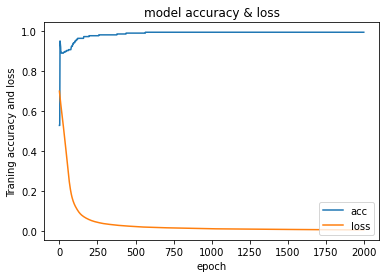

In [21]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("Traning accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

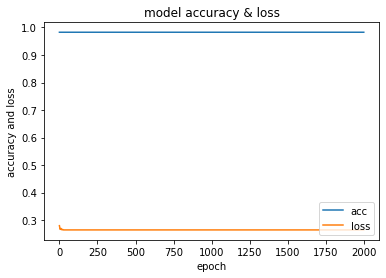

In [25]:
#Visualize the models accuracy and loss
plt.plot(history_testing.history["accuracy"])
plt.plot(history_testing.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [26]:
#Save the model
model.save("chronic_kidney.model")

In [29]:
model.save("C_k_d.h5")

In [46]:
import pickle 
pickle.dump(model,open('chronic_k_d.pkl','wb'))

In [45]:
print("---------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
---------------------------------------------------------


In [28]:
import glob
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  chronic_kidney.model
58/58 [==============================] - 0s 310us/step

Original  : 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1

Predicted : 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1

Scores    : loss =  0.26291789679691707  acc =  0.982758641242981
---------------------------------------------------------



In [52]:
X_test

,sg,al,sc,hemo,pcv,htn
108,0.50,0.0,0.025424,0.591837,0.538462,0.0
171,0.75,0.6,0.093220,0.380952,0.256410,1.0
214,0.50,0.0,0.025424,0.721088,0.000000,0.0
111,0.25,0.6,0.169492,0.469388,0.410256,1.0
344,0.75,0.0,0.012712,0.768707,0.666667,0.0
302,0.75,0.0,0.033898,0.795918,0.820513,0.0
80,0.25,0.0,0.101695,0.523810,0.384615,1.0
261,0.75,0.0,0.033898,0.945578,0.641026,0.0
51,0.50,0.6,0.050847,0.489796,0.435897,1.0
7,0.50,0.4,0.029661,0.632653,0.717949,0.0


In [54]:
l=[0.75,	0.0,	0.012712,	0.768707,	0.666667,	0.0]
a=np.array(l)
print(a.shape)
pred=(model.predict([[a]]))
print(pred)

(6,)
[[1.]]


In [35]:
#Post Processing
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
l=[1.005, 4.2, 3.8,  11.2, 16,1]
# a=np.array(l)
# a=a.reshape(-1,1)
# x_scaler = MinMaxScaler(min_list,max_list)
# x_scaler.fit(a)
# print(np.round(x_scaler.transform(a),2))

for i in range(len(l)):
    l[i]=(l[i]-min_list[i])/(max_list[i]-min_list[i])
print(l)
a=np.array(l)
print(a.shape)
pred=(model.predict([[a]]))
print(pred)

[0.0, 0.8400000000000001, 0.14406779661016947, 0.5510204081632653, 0.41025641025641024, 1.0]
(6,)


NameError: name 'model' is not defined

In [4]:
x_scaler

MinMaxScaler()

In [5]:
a

array([[ 1.02],
       [ 1.  ],
       [ 1.2 ],
       [15.4 ],
       [28.  ],
       [ 1.  ]])